## 1 - 패키지

코드 실행에 필요한 패키지 입니다.
- [numpy](www.numpy.org)는 Python에서 행렬 작업을 위한 기본 패키지입니다.
- [matplotlib](http://matplotlib.org)는 Python에서 그래프를 그리는 라이브러리입니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

## 2 - 문제 설명

당신이 레스토랑 프랜차이즈의 CEO이고 새로운 매장을 열기 위해 여러 도시를 고려하고 있다고 가정해 보겠습니다.

이미 다양한 도시에 레스토랑이 있으며 해당 도시의 수익과 인구에 대한 데이터가 있습니다.

데이터를 사용하여 비즈니스에 더 높은 수익을 줄 수 있는 도시를 식별할 수 있는지에 대한 문제입니다.

## 3 - 데이터세트


아래 표시된 `load_data()` 함수는 데이터를 `x_train` 및 `y_train` 변수에 로드합니다.
- `x_train`은 도시의 인구입니다.
- `y_train`은 해당 도시에 있는 레스토랑의 수익입니다. 이익의 음수 값은 손실을 나타냅니다.
- `X_train`과 `y_train`은 모두 numpy 배열입니다.

## 4 - 풀이방법

인구수에 따른 수익률 예상을 위해 normal equation과 gradient descent 방식을 사용하여 Linear Regression을 진행하면 됩니다.

본 과제는 normal equation, compute_cost, compute_gradient, gradient_descent 함수에서 start code와 end code 사이에 코드를 작성하면 되는 과제입니다.

- 꼭 `data.txt` 파일을 코랩에서 함께 업로드 하여 사용해주세요

- Data load에 문제가 있을시 코드를 바꾸어 사용해도 됩니다. 바꾸면 꼭 주석을 달아주세요


In [2]:
def load_data():
    data = np.loadtxt("data.txt", delimiter=',')
    X = data[:,0]
    y = data[:,1]
    return X, y

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [6.1101 5.5277 8.5186 7.0032 5.8598]
Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]
The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


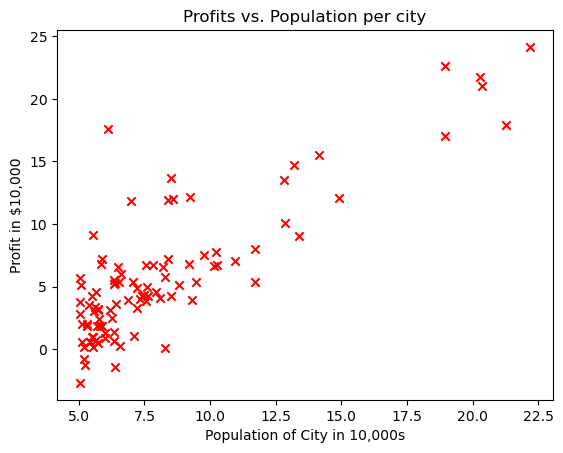

In [3]:
x_train, y_train = load_data()

print("Type of x_train:",type(x_train))
print("First five elements of x_train are:\n", x_train[:5]) 

print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])  

print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

plt.scatter(x_train, y_train, marker='x', c='r') 
plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [4]:
def normal_equation(x,y):
    """
    Compute theta using normal equation
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
        
    Returns
        parameter w and b (weight and bias)
    
    """
    
    ### START CODE HERE ### 
    
    X = np.vstack([np.ones(len(x)), x]).T  ## 사용시 w와 b를 둘 다 구할 수 있습니다.
    
    # W = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    b = w[0]
    w = w[1]

    ### END CODE HERE ###
    
    return w, b

In [5]:

def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    # You need to return this variable correctly
    total_cost = 0
    
    ### START CODE HERE ###  
    cost_sum = np.sum((w * x + b - y) ** 2)

    total_cost = cost_sum / m
    ### END CODE HERE ### 

    return total_cost

In [6]:
### test comput cost ###

# initial_w = 2
# initial_b = 1

# cost = compute_cost(x_train, y_train, initial_w, initial_b)
# print(type(cost))
# print(f'Cost at initial w: {cost:.3f}')

In [7]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]
    
    # You need to return the following variables correctly
    dj_dw = 0
    dj_db = 0
    
    ### START CODE HERE ### 
    
    dj_dw = np.dot(x, w * x + b - y)
    dj_db = np.sum(w * x + b - y)
          
    dj_dw = dj_dw/m
    dj_db = dj_db/m    
    ### END CODE HERE ### 
        
    return dj_dw, dj_db

In [8]:
### test for compute gradient ###

# initial_w = 0
# initial_b = 0

# tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
# print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

In [9]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    # m = len(x)
    
    # An array to store cost and w's at each iteration — primarily for graphing later
    cost_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        ### START CODE HERE ###
        
        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db           

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion  ## do not change i<100000
            cost =  cost_function(x, y, w, b)
            cost_history.append(cost)
            w_history.append(w)
            
            ## Hint : cost_history.append(cost)

        ### END CODE HERE ###
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(cost_history[-1]):8.2f}   ")
        
    return w, b, cost_history, w_history #return w and J,w history for graphing

In [10]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
learning_rate = 0.01

w_g,b_g,cost_history ,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, learning_rate, iterations)
print("w,b found by gradient descent:", w_g, b_g)

w_n, b_n = normal_equation(x_train, y_train)
print("w,b found by normal equation:", w_n, b_n)


Iteration    0: Cost    13.47   
Iteration  150: Cost    10.62   
Iteration  300: Cost     9.93   
Iteration  450: Cost     9.52   
Iteration  600: Cost     9.28   
Iteration  750: Cost     9.15   
Iteration  900: Cost     9.07   
Iteration 1050: Cost     9.02   
Iteration 1200: Cost     8.99   
Iteration 1350: Cost     8.98   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436
w,b found by normal equation: 1.1930336441895935 -3.8957808783118537


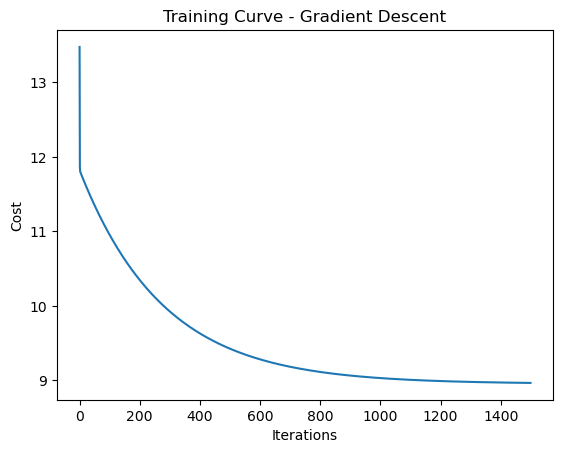

In [11]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Training Curve - Gradient Descent')
plt.show()